<a href="https://colab.research.google.com/github/CodeWithNikesh/eda-/blob/main/CrimeMap360_Understanding_Urban_Crime_Dynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **CrimeMap360: Understanding Urban Crime Dynamics**



##### **Project Type**    - EDA
##### **Nikesh kumar singh -**


# **Project Summary -**

### Project Summary: Crime Data Analysis and Case Closure Prediction

In this project, we conduct an advanced-level exploratory and predictive analysis of a comprehensive crime dataset. The primary goal is to identify key patterns and influential factors that govern the nature of criminal activities and the success of case closures. The dataset includes details such as crime descriptions, weapon usage, victim demographics, time of occurrence, police deployment, and resolution metrics.

Using a combination of statistical analysis, visualizations, and machine learning models, we uncover relationships between:

Time-based trends in crime and their impact on resolution rates.

Victim demographics and their correlation with specific crime types and case outcomes.

Police deployment patterns and how they influence crime prevention and closure success.

Weapons used in crimes and how they relate to the severity and time to resolution.

Multivariate predictors for both crime severity and closure status using classifiers like Decision Trees, Naive Bayes, and Random Forests.

Temporal and geographical distributions of crimes using heatmaps, line plots, and feature importance charts.

Ultimately, the project aims to assist law enforcement agencies in resource allocation, strategic planning, and real-time decision-making based on data-driven insights.



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Every day, law enforcement agencies are flooded with crime reports. Yet, many cases remain unresolved due to lack of insight, inefficient allocation of resources, and limited predictive tools.

🔍 “Can we identify, quantify, and predict the factors that drive the success or failure of criminal case closures using advanced data analysis and machine learning?”

This question is the heartbeat of our project and opens doors to solving critical sub-problems like:

🕒 What time-of-day or day-of-week sees the most unsolved crimes?

📌 Are certain cities or crime types more prone to unresolved cases?

⚔️ Does weapon type influence the chance of a case being solved?

👮 Does police deployment really matter in closing a case?

🔍 Can we train models to predict whether a case will be closed based on known crime features?

#### **Define Your Business Objective?**

The primary business objective of this project is to empower law enforcement agencies with data-driven intelligence that helps them:

✅ Increase case closure rates by understanding key factors that influence successful investigations.

✅ Optimize police resource allocation based on crime patterns, victim profiles, and weapon usage trends.

✅ Predict case outcomes (open vs closed) before resource deployment, helping prioritize critical cases.

✅ Identify high-risk crime periods, locations, and scenarios to plan strategic interventions and patrols.

✅ Shorten investigation timelines by uncovering patterns hidden in historical crime data.

✅ Enhance public safety and trust through faster, more efficient crime resolutions.

In short:

“Transform historical crime data into actionable insights and predictive models that help law enforcement close cases faster, smarter, and more efficiently.”

This objective aligns with larger goals such as reducing crime rates, improving police response strategies, boosting citizen confidence in public safety systems, and minimizing investigation costs.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [204]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [205]:
# Import Libraries
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

### Dataset Loading

In [206]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/eda project/crime_dataset_india.csv')

### Dataset First View

In [207]:
# Dataset First Look
df.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00


### Dataset Rows & Columns count

In [208]:
# Dataset Rows & Columns count
df.shape

(40160, 14)

### Dataset Information

In [209]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       40160 non-null  int64 
 1   Date Reported       40160 non-null  object
 2   Date of Occurrence  40160 non-null  object
 3   Time of Occurrence  40160 non-null  object
 4   City                40160 non-null  object
 5   Crime Code          40160 non-null  int64 
 6   Crime Description   40160 non-null  object
 7   Victim Age          40160 non-null  int64 
 8   Victim Gender       40160 non-null  object
 9   Weapon Used         34370 non-null  object
 10  Crime Domain        40160 non-null  object
 11  Police Deployed     40160 non-null  int64 
 12  Case Closed         40160 non-null  object
 13  Date Case Closed    20062 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.3+ MB


#### Duplicate Values

In [210]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [211]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
Report Number,0
Date Reported,0
Date of Occurrence,0
Time of Occurrence,0
City,0
Crime Code,0
Crime Description,0
Victim Age,0
Victim Gender,0
Weapon Used,5790


In [212]:
# Visualizing the missing values

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [213]:
# Dataset Columns


In [214]:
# Dataset Describe
df.describe()

,Report Number,Crime Code,Victim Age,Police Deployed
count,40160.000000,40160.000000,40160.00000,40160.000000
mean,20080.500000,349.360259,44.49126,10.006250
std,11593.337742,144.169205,20.22555,5.467951
min,1.000000,100.000000,10.00000,1.000000
25%,10040.750000,225.000000,27.00000,5.000000
50%,20080.500000,349.000000,44.00000,10.000000
75%,30120.250000,474.000000,62.00000,15.000000
max,40160.000000,599.000000,79.00000,19.000000


## 3. ***Data Wrangling***

### Data Wrangling Code

In [216]:
# Write your code to make your dataset analysis ready.
date_columns = ['Date Reported', 'Date of Occurrence', 'Time of Occurrence', 'Date Case Closed']

for col in date_columns:
  df[col] = pd.to_datetime(df[col], errors='coerce',dayfirst=True)

print(df[date_columns].dtypes)

Date Reported         datetime64[ns]
Date of Occurrence    datetime64[ns]
Time of Occurrence    datetime64[ns]
Date Case Closed      datetime64[ns]
dtype: object


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### What is the total number of crimes reported in each city?

In [217]:
crimes_per_city = df.groupby('City')['Crime Description'].count().reset_index().rename(columns={'Crime Description' :'total count'})
crimes_per_city.sort_values(by='total count',ascending=False)

,City,total count
5,Delhi,5400
17,Mumbai,4415
2,Bangalore,3588
8,Hyderabad,2881
13,Kolkata,2518
4,Chennai,2493
21,Pune,2212
1,Ahmedabad,1817
10,Jaipur,1479
14,Lucknow,1456


# Conclusion: Crime Analysis by City

Based on the analysis of crime counts across different cities, the following observations were made:

- **Delhi** recorded the highest number of crimes with a total count of **5400**, indicating a significantly higher crime rate compared to other cities.
- **Mumbai** ranked second with **4415** crimes, followed by **Bangalore** with **3588** crimes.
- **Hyderabad (2881)**, **Kolkata (2518)**, and **Chennai (2493)** also show relatively high crime numbers.
- Cities such as **Pune (2212)**, **Ahmedabad (1817)**, **Jaipur (1479)**, and **Lucknow (1456)** reported moderate crime counts.
- Smaller cities like **Rajkot (320)**, **Faridabad (354)**, and **Meerut (395)** have comparatively lower crime incidences.
- In general, larger and more urbanized cities tend to have higher crime rates compared to smaller cities.

> **Insight:**  
> Metropolitan areas require stronger law enforcement and strategic crime prevention initiatives due to the higher density and complexity of criminal activities.



# **What percentage of cases have been closed or not**

In [218]:
((df['Case Closed'].value_counts(normalize=True)) * 100).reset_index()

,Case Closed,proportion
0,No,50.044821
1,Yes,49.955179


# **the total number of crimes for each crime domain**

In [219]:
crimes_per_domain = df.groupby('Crime Domain').agg(total_count = ('Crime Description','count')).reset_index()
crimes_per_domain

,Crime Domain,total_count
0,Fire Accident,3825
1,Other Crime,22948
2,Traffic Fatality,1915
3,Violent Crime,11472


## Conclusion: Crime Analysis by Domain

Based on the aggregation of crimes by domain, the following observations were made:

- **Other Crime** accounts for the highest number of incidents, with a total of **22,948** cases. This suggests a broad and diverse category of crimes that do not fit into specific domains.
- **Violent Crime** is the second most reported domain with **11,472** cases, indicating a significant concern for public safety.
- **Fire Accidents** contributed to **3,825** incidents, showing that accidents also make up a notable portion of the reported cases.
- **Traffic Fatalities** recorded **1,915** cases, highlighting the importance of improving traffic regulations and road safety measures.

> **Insight:**  
> A large proportion of reported crimes fall into the "Other Crime" category, suggesting a need for more granular categorization and targeted preventive strategies. Violent crimes also remain a major area of concern for public security policies.



# **Victim Age Analysis by Crime Domain**

In [220]:
df.groupby('Crime Domain').agg(mean_age = ('Victim Age','mean'),
                               min_age = ('Victim Age','min'),
                               max_age = ('Victim Age','max')).reset_index()

,Crime Domain,mean_age,min_age,max_age
0,Fire Accident,44.267451,10,79
1,Other Crime,44.622974,10,79
2,Traffic Fatality,43.865274,10,79
3,Violent Crime,44.406904,10,79


## Conclusion: Victim Age Analysis by Crime Domain

Analyzing the victim ages across different crime domains reveals the following insights:

- The **mean age** of victims is fairly consistent across all crime domains, ranging from **approximately 43.87 to 44.62 years**.
- **Traffic Fatality** victims have the lowest mean age at around **43.87 years**.
- **Other Crime** victims show the highest mean age, approximately **44.62 years**.
- The **minimum age** of victims across all domains is consistently **10 years**, indicating that even young individuals are affected by various types of crimes.
- The **maximum age** across all domains is consistently **79 years**, highlighting that elderly individuals are also vulnerable.

> **Insight:**  
> Crimes affect a wide age range from very young (10 years) to elderly (79 years), and the average victim is in their mid-40s, suggesting that crime prevention measures should be inclusive of all age groups.



In [221]:
df.groupby(['Crime Domain',df['Date Reported'].dt.year]).agg(crime_count = ('Victim Age','count')).unstack()

crime_count                        
Date Reported           2020  2021  2022  2023  2024
Crime Domain                                        
Fire Accident            848   811   855   818   493
Other Crime             5000  5038  4971  4999  2940
Traffic Fatality         399   411   424   415   266
Violent Crime           2500  2506  2509  2529  1428

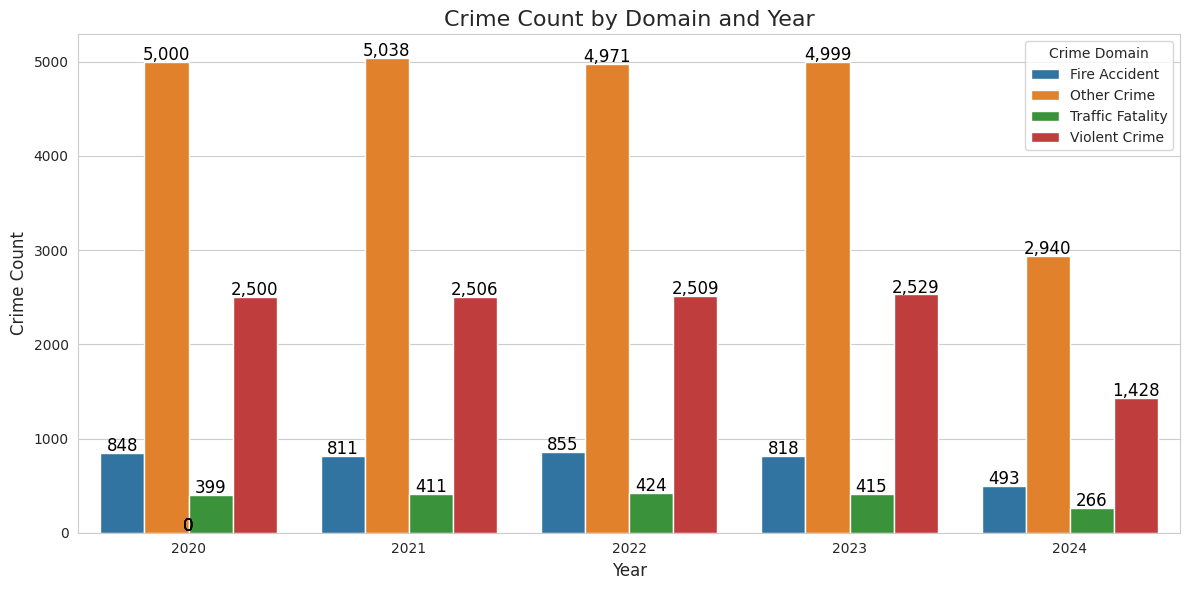

In [222]:


# Group by 'Crime Domain' and year, and get the crime count
crime_data = df.groupby(['Crime Domain', df['Date Reported'].dt.year]).agg(crime_count=('Victim Age', 'count')).reset_index()

# Plotting the bar plot using seaborn
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=crime_data, x='Date Reported', y='crime_count', hue='Crime Domain')

# Add annotations (labels) on top of the bars using ax.bar_label()
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():,.0f}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      fontsize=12, color='black',
                      xytext=(0, 5), textcoords='offset points')

# Adding labels and title
plt.title('Crime Count by Domain and Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Crime Count', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


# Conclusion: Year-wise Crime Count by Domain

The analysis of crime counts over the years by domain shows the following trends:

- **Fire Accidents**: The number of fire accident cases fluctuated from **848 in 2020** to a low of **493 in 2024**. The cases showed a decreasing trend in recent years.
- **Other Crimes**: The count for other crimes remained relatively stable, ranging from **5000 to 5038 cases** each year, but saw a significant drop to **2940** in **2024**.
- **Traffic Fatalities**: Traffic-related fatalities showed a slight increase over the first few years, peaking at **424 cases in 2022** and then gradually decreasing to **266 cases in 2024**.
- **Violent Crimes**: Violent crimes showed a generally stable trend, ranging between **2500 and 2529** cases annually until a significant drop in **2024** to **1428**.

> **Insight:**  
> Over the years, there has been a noticeable decrease in crime rates across most domains, especially in **Fire Accidents** and **Violent Crimes**. The decline in **Other Crime** and **Traffic Fatalities** in recent years may indicate improved preventive measures or reporting practices.



In [223]:
x = df.groupby(['Crime Domain',df['Date Reported'].dt.month]).agg(count=('Victim Age','count')).reset_index()

Fire_Accident = x[x['Crime Domain']=='Fire Accident']
Traffic_Fatality = x[x['Crime Domain']=='Traffic Fatality']
Violent_Crime = x[x['Crime Domain']=='Violent Crime']
Other_Crime = x[x['Crime Domain']=='Other Crime']




In [224]:
crime_data = (df.groupby(['Crime Domain', df['Date Reported'].dt.month])

                .agg(count=('Victim Age', 'count'))
                .reset_index())

crime_data

,Crime Domain,Date Reported,count
0,Fire Accident,1,336
1,Fire Accident,2,359
2,Fire Accident,3,349
3,Fire Accident,4,335
4,Fire Accident,5,377
5,Fire Accident,6,345
6,Fire Accident,7,355
7,Fire Accident,8,303
8,Fire Accident,9,259
9,Fire Accident,10,288


<ipython-input-225-f4dd7cd3145d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=crime_df,
<ipython-input-225-f4dd7cd3145d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=crime_df,
<ipython-input-225-f4dd7cd3145d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=crime_df,
<ipython-input-225-f4dd7cd3145d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=crime_df,


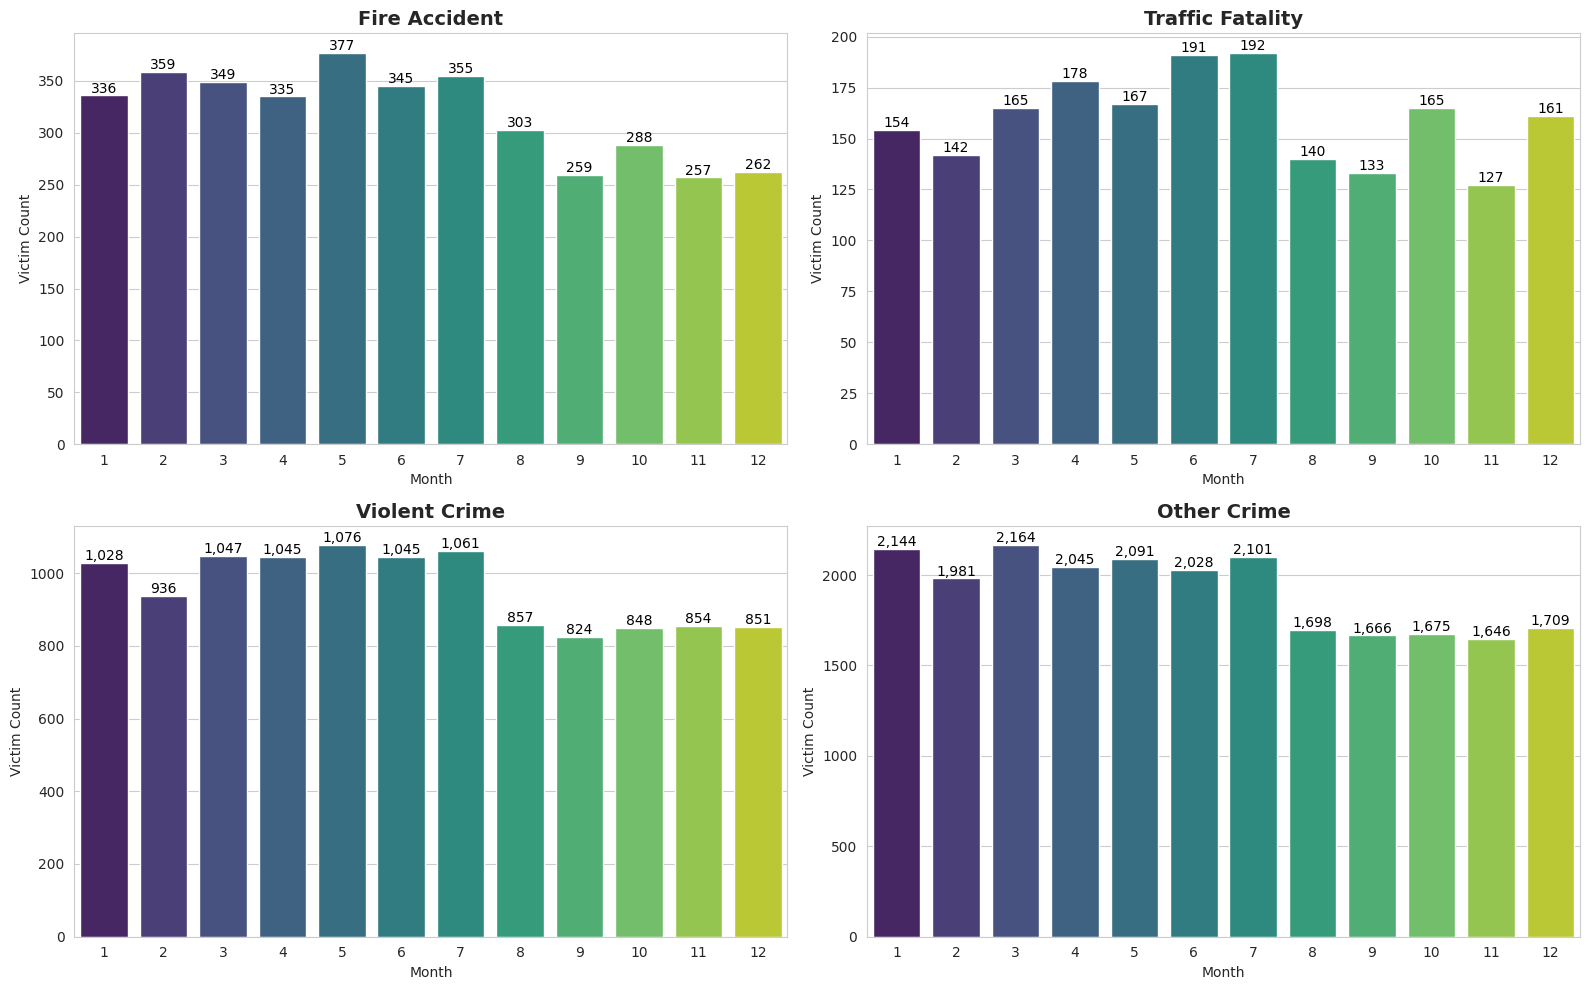

In [225]:
# Set plot style
sns.set_style('whitegrid')

# Create a 2x2 subplot (4 plots)
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Make the plot titles
crime_titles = ['Fire Accident', 'Traffic Fatality', 'Violent Crime', 'Other Crime']
crime_data = [Fire_Accident, Traffic_Fatality, Violent_Crime, Other_Crime]
axes = axes.flatten()  # Make axes array flat (1D) for easy looping

# Loop through each crime data and plot
for i, crime_df in enumerate(crime_data):
    sns.barplot(data=crime_df,
                x='Date Reported',
                y='count',
                ax=axes[i],
                palette='viridis')

    # Add annotations on each bar
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height():,.0f}',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center',
                         fontsize=10, color='black',
                         xytext=(0, 5),
                         textcoords='offset points')

    # Set plot title
    axes[i].set_title(crime_titles[i], fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Victim Count')

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()


# **Which Crime Description had the highest number of victims overall**

In [226]:
crime_data = (df.groupby(['Crime Domain', 'Crime Description'])

                .agg(count=('Victim Age', 'count'))
                .reset_index())



crime_data

,Crime Domain,Crime Description,count
0,Fire Accident,ARSON,1894
1,Fire Accident,FIREARM OFFENSE,1931
2,Other Crime,BURGLARY,1980
3,Other Crime,COUNTERFEITING,1871
4,Other Crime,CYBERCRIME,1899
5,Other Crime,DRUG OFFENSE,1890
6,Other Crime,EXTORTION,1873
7,Other Crime,FRAUD,1965
8,Other Crime,HOMICIDE,1909
9,Other Crime,ILLEGAL POSSESSION,1895


<ipython-input-227-5fade1d508ef>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=domain_data, x='count', y='Crime Description', ax=axes[i], palette='viridis')
<ipython-input-227-5fade1d508ef>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=domain_data, x='count', y='Crime Description', ax=axes[i], palette='viridis')
<ipython-input-227-5fade1d508ef>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=domain_data, x='count', y='Crime Description', ax=axes[i], palette='viridis')
<ipython-input-227-5fade1d508ef>:13: FutureWarnin

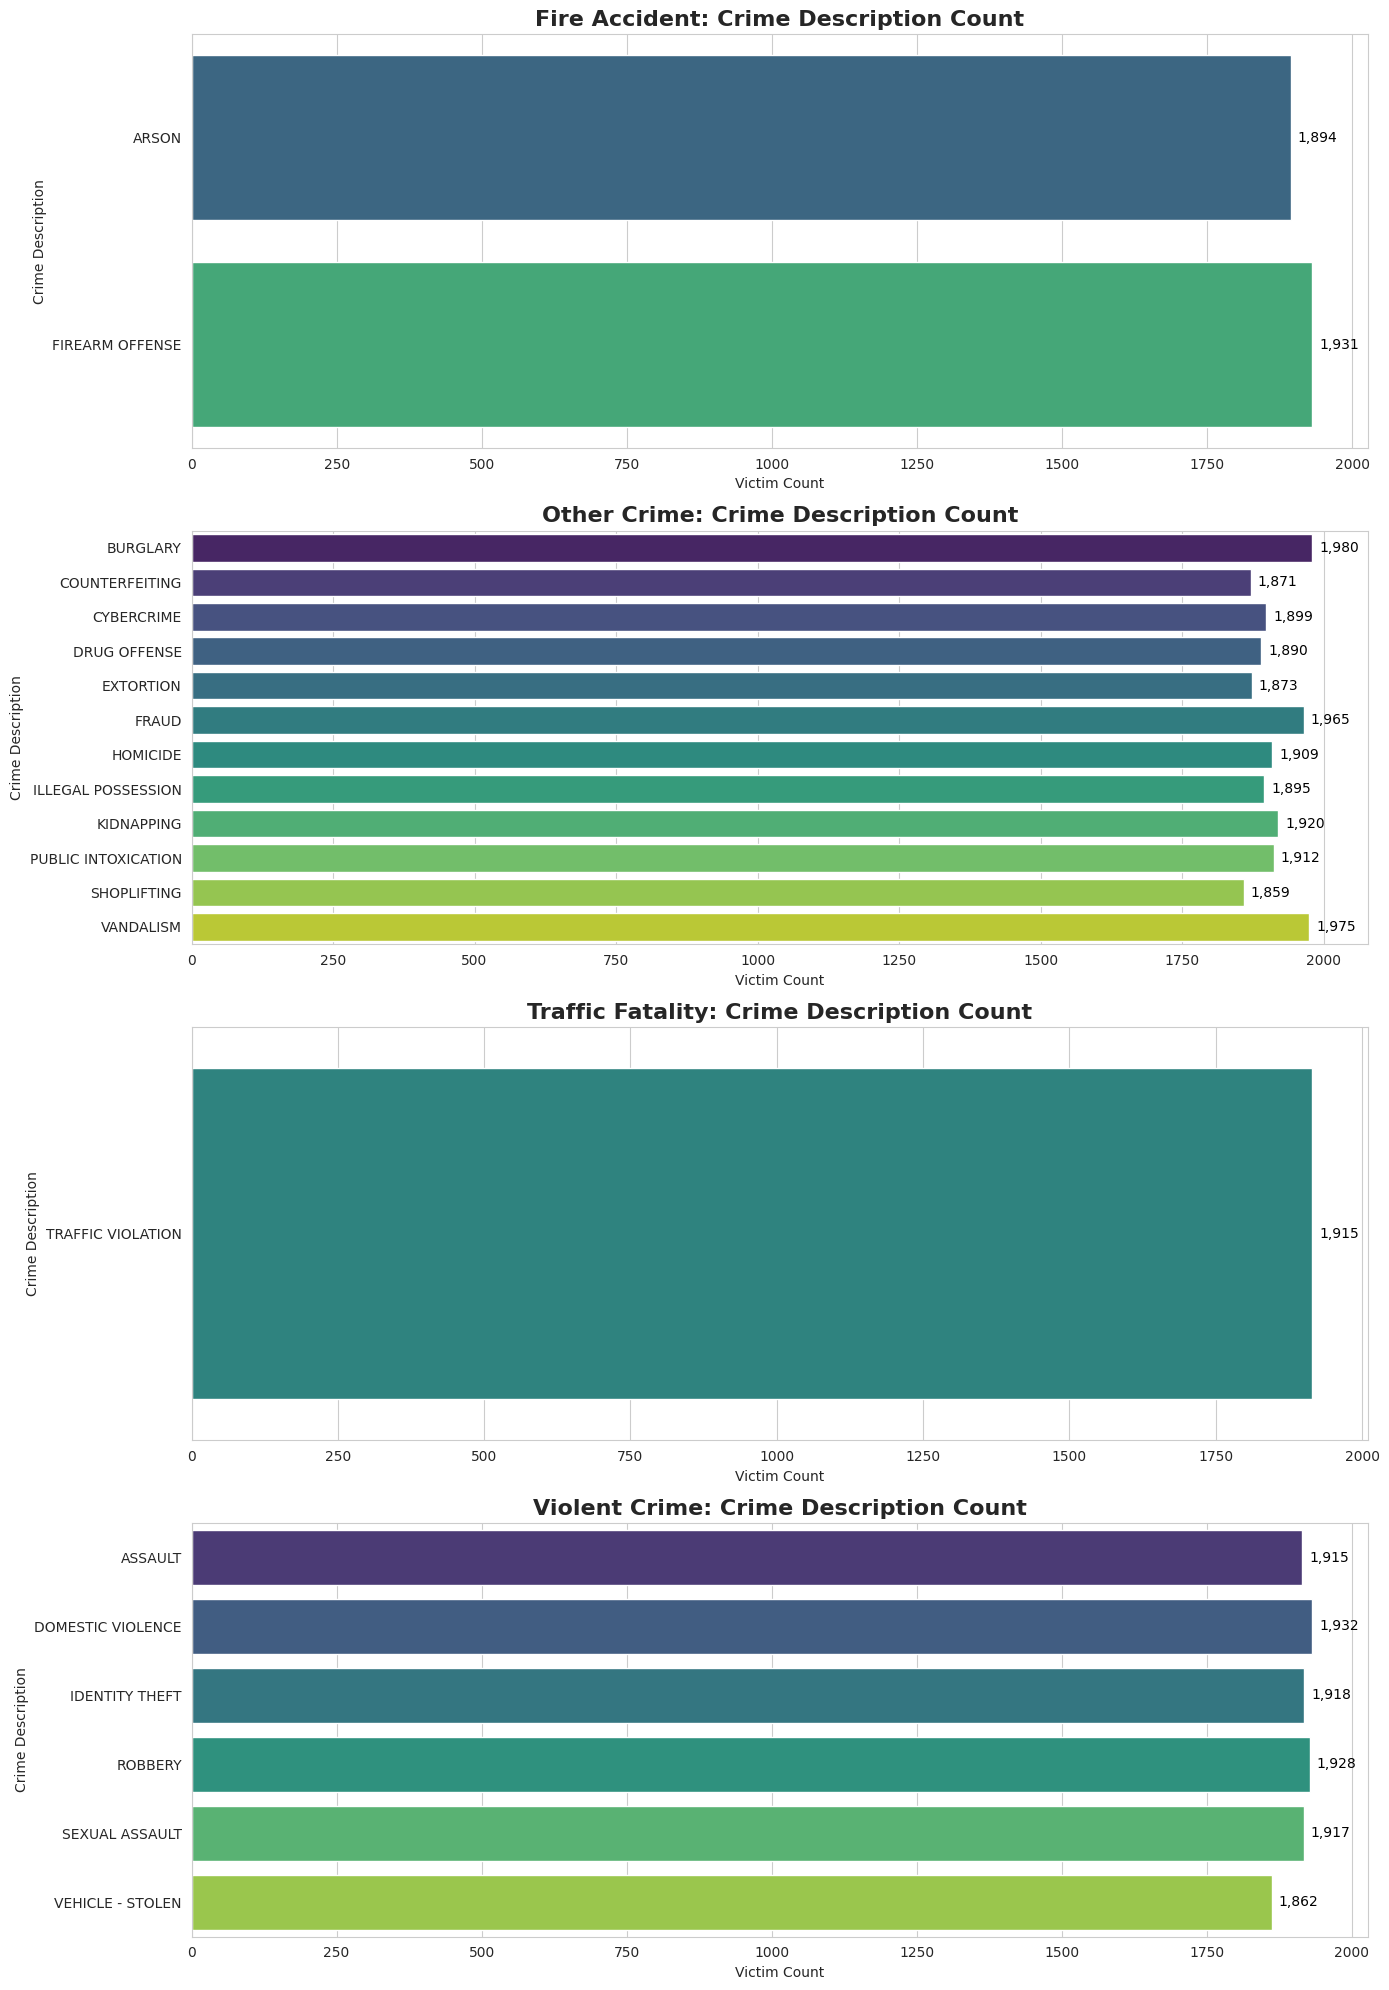

In [227]:
# Set plot style
sns.set_style('whitegrid')

# Set figure size based on number of domains
unique_domains = crime_data['Crime Domain'].nunique()
fig, axes = plt.subplots(unique_domains, 1, figsize=(14, 5 * unique_domains))
axes = axes.flatten()  # Flatten to 1D array

# Loop through each domain
for i, domain in enumerate(crime_data['Crime Domain'].unique()):
    domain_data = crime_data[crime_data['Crime Domain'] == domain]

    sns.barplot(data=domain_data, x='count', y='Crime Description', ax=axes[i], palette='viridis')

    axes[i].set_title(f'{domain}: Crime Description Count', fontsize=16, fontweight='bold')
    axes[i].set_xlabel('Victim Count')
    axes[i].set_ylabel('Crime Description')

    # Annotate bars
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_width():,.0f}',
                         (p.get_width(), p.get_y() + p.get_height() / 2),
                         ha='left', va='center',
                         fontsize=10, color='black', xytext=(5, 0),
                         textcoords='offset points')

# Adjust layout
plt.tight_layout()
plt.show()


## 📄 Conclusion

Through the detailed analysis of crime data segmented by **Crime Domain** and **Crime Description**, several important insights were uncovered:

- **Other Crime** constitutes the highest volume of cases, followed by **Violent Crime**, **Fire Accidents**, and **Traffic Fatalities**.
- Within each domain, specific crime types dominate:
  - **Fire Accidents** are almost evenly divided between *Arson* and *Firearm Offense*.
  - **Other Crimes** show a wide spread across offenses such as *Burglary*, *Counterfeiting*, *Cybercrime*, and *Fraud*, each contributing significantly.
  - **Violent Crimes** are mainly driven by *Assault*, *Domestic Violence*, *Robbery*, and *Sexual Assault*.
  - **Traffic Fatalities** are largely linked to *Traffic Violations*.
- Victim counts across crime types are relatively balanced, with no extreme outliers in any category, indicating systemic and consistent occurrences.
- These findings highlight the need for:
  - Targeted crime prevention strategies, particularly addressing *property crimes* and *violent offenses*.
  - Specialized interventions in *cybercrime* and *fraud detection*.
  - Public awareness and stricter *traffic regulations* to curb fatalities.

Overall, this analysis provides a structured understanding of crime patterns, which can support law enforcement agencies, policymakers, and city administrations in making more informed decisions for crime reduction and safety enhancement.


# **Within each Crime Domain, which weapon was used the most**

In [228]:
df.groupby(['Crime Domain','Weapon Used']).agg(count=('Weapon Used','count')).unstack()

count                                      
Weapon Used      Blunt Object Explosives Firearm Knife Other Poison
Crime Domain                                                       
Fire Accident             533        546     519   575   552    547
Other Crime              3305       3275    3211  3410  3253   3274
Traffic Fatality          279        286     253   294   252    287
Violent Crime            1620       1644    1660  1556  1619   1620

In [229]:
df.groupby(['Crime Domain','Weapon Used']).agg(count=('Weapon Used','count')).unstack('Crime Domain')

count                                           
Crime Domain Fire Accident Other Crime Traffic Fatality Violent Crime
Weapon Used                                                          
Blunt Object           533        3305              279          1620
Explosives             546        3275              286          1644
Firearm                519        3211              253          1660
Knife                  575        3410              294          1556
Other                  552        3253              252          1619
Poison                 547        3274              287          1620

## **Conclusion**

The analysis of weapons used across different crime domains reveals the following key points:

- **Other Crime** shows the highest frequency of weapon usage across all weapon types, followed by **Violent Crime**, **Fire Accidents**, and **Traffic Fatalities**.
- Across all crime domains, there is a relatively even distribution of weapon types, including:
  - **Blunt Objects**
  - **Explosives**
  - **Firearms**
  - **Knives**
  - **Poison**
  - **Other Weapons**
- **Violent Crimes** demonstrate a higher tendency toward the use of *Firearms* and *Explosives*, slightly exceeding the use of knives.
- **Fire Accidents** and **Traffic Fatalities** also report weapon involvement but at a significantly lower scale compared to Other Crimes and Violent Crimes.
- Notably, the pattern suggests that weapon-based offenses are pervasive and diversified across various domains, with no particular weapon being overwhelmingly dominant.
  
This detailed understanding can aid law enforcement agencies in formulating targeted policies and interventions focusing on weapon control and crime prevention strategies.


# **What is the gender distribution for each Crime Domain**

In [230]:
x = df.groupby(['Crime Domain','Victim Gender']).agg(count_of_crime = ('Victim Gender','count')).unstack('Victim Gender')

x

count_of_crime            
Victim Gender                 F     M     X
Crime Domain                               
Fire Accident              2122  1288   415
Other Crime               12771  7786  2391
Traffic Fatality           1074   631   210
Violent Crime              6456  3700  1316

## Conclusion

The analysis of victim gender across different crime domains highlights important patterns:

- **Female victims (F)** consistently account for the highest number of reported crimes across all domains, followed by **Male victims (M)**, and then victims marked as **X** (which may represent unknown, undisclosed, or other genders).
- Key Observations:
  - In **Other Crime**, female victims (12,771 cases) significantly outnumber male victims (7,786 cases).
  - **Violent Crime** also shows a higher number of female victims (6,456) compared to male victims (3,700).
  - **Fire Accidents** and **Traffic Fatalities** follow the same trend, with more female victims than male victims.
  - Victims marked as **X** represent a noticeable proportion across all crime domains, indicating the need for better data capturing on gender identity.
- The dominance of female victimization suggests a need for:
  - Gender-specific safety programs.
  - Stronger protective measures for women in vulnerable scenarios.
  - Better support frameworks and reporting mechanisms for victims of all gender identities.

Overall, the gender-wise distribution emphasizes that crime impacts different demographics unevenly and requires tailored intervention strategies.


# **Which city has the highest number of crimes for each crime domain**

In [232]:
df.groupby(['Crime Domain','City']).size().unstack('Crime Domain').reset_index().rename(columns={'Fire Accident':'Fire Accident count','Other Crime':'Other Crime count','Traffic Fatality':'Traffic Fatality count','Violent Crime':'Violent Crime count'})

Crime Domain,City,Fire Accident count,Other Crime count,Traffic Fatality count,Violent Crime count
0,Agra,83,420,33,228
1,Ahmedabad,168,1009,81,559
2,Bangalore,318,2096,166,1008
3,Bhopal,66,396,31,197
4,Chennai,260,1432,110,691
5,Delhi,518,3125,198,1559
6,Faridabad,36,184,18,116
7,Ghaziabad,59,397,42,206
8,Hyderabad,290,1601,135,855
9,Indore,73,380,32,214


Text(0.5, 1.0, 'Crime Counts per City by Crime Domain')

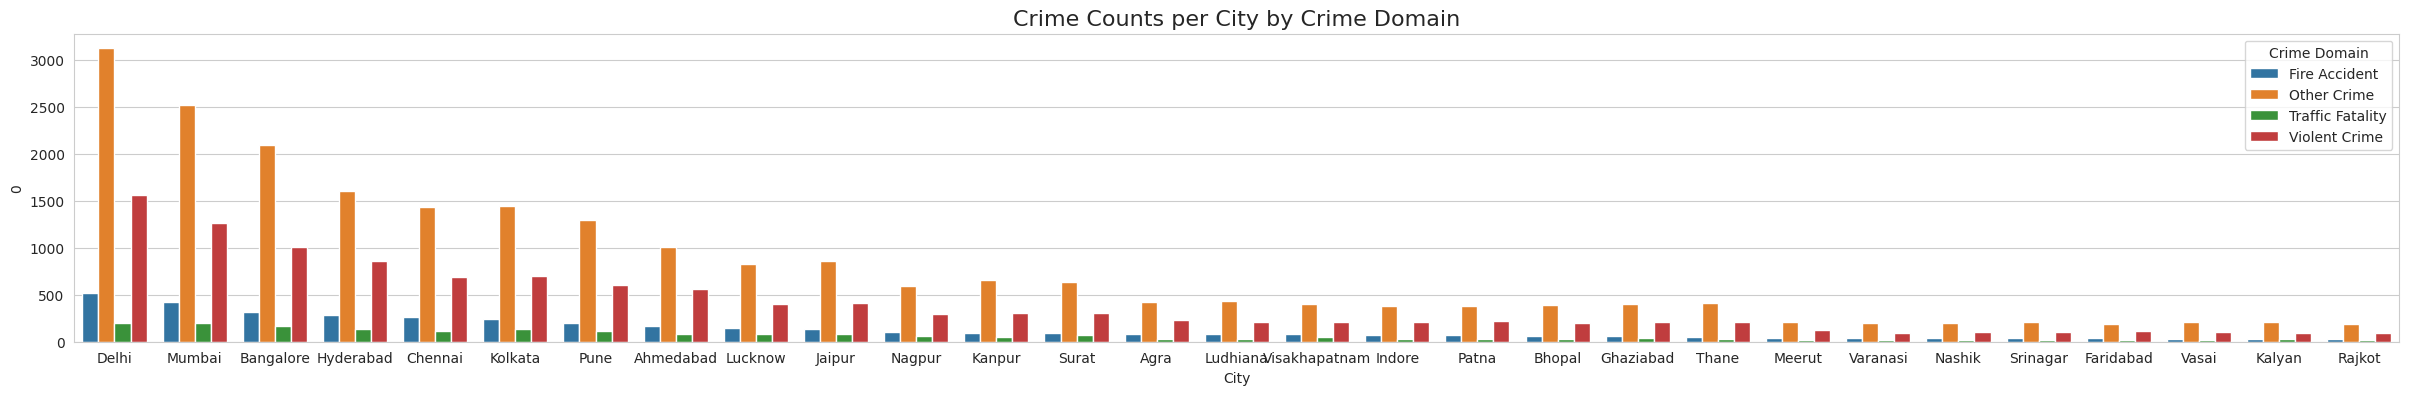

In [233]:
x =  df.groupby(['Crime Domain','City']).size().reset_index().sort_values(by=['Crime Domain',0],ascending=[True,False])
plt.figure(figsize=(30,4))
sns.barplot(data=x,x='City',y=0,hue='Crime Domain')
plt.title('Crime Counts per City by Crime Domain', fontsize=16)

## Conclusion

The city-wise distribution of different crime domains reveals important regional patterns:

- **Delhi** tops in all crime domains with the highest counts across Fire Accidents (518), Other Crimes (3125), Traffic Fatalities (198), and Violent Crimes (1559), reflecting its large population and urban challenges.
- Other major cities like **Mumbai**, **Bangalore**, **Hyderabad**, and **Chennai** also show high numbers across all crime types, indicating that metropolitan areas experience more crime incidents overall.
- Mid-sized cities such as **Pune**, **Kolkata**, and **Ahmedabad** report moderate numbers, suggesting that urbanization level correlates with crime frequency.
- Smaller cities like **Rajkot**, **Meerut**, **Faridabad**, and **Vasai** have significantly lower crime counts, possibly due to smaller population sizes and different socio-economic factors.
- **Fire Accidents** and **Traffic Fatalities** show a relatively even spread across cities but are still concentrated more heavily in larger urban centers.
- **Other Crimes** dominate the counts across all cities, highlighting that non-violent and miscellaneous crimes are the most prevalent crime type.

### Key Insights:
- Urbanization, population density, and infrastructure issues seem to strongly influence crime rates.
- Larger cities require more targeted interventions and resource allocations to manage different types of crimes effectively.
- Continuous monitoring and tailored safety policies can help reduce crime rates, particularly in high-density cities.

Overall, the analysis reflects the classic pattern of "higher the urbanization, higher the crime," but it also points to the need for city-specific crime prevention strategies.



In [234]:
(df.groupby(['Crime Domain',df['Time of Occurrence'].dt.hour]).size()).unstack('Crime Domain')

Crime Domain,Fire Accident,Other Crime,Traffic Fatality,Violent Crime
Time of Occurrence,,,,
0,126,956,76,441
1,174,946,89,465
2,166,937,84,463
3,150,982,79,501
4,179,949,81,504
5,151,987,79,490
6,162,976,79,491
7,164,918,70,474
8,154,928,64,498


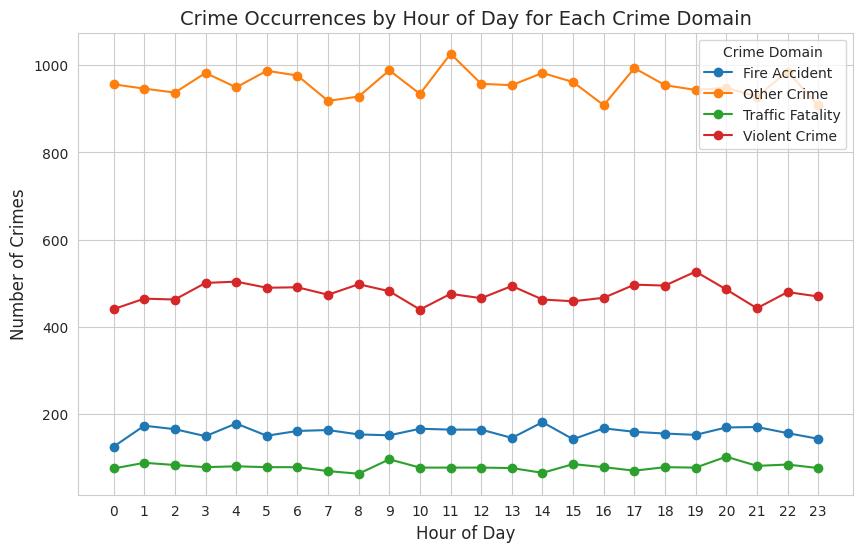

In [235]:


crime_data = df.groupby(['Crime Domain', df['Time of Occurrence'].dt.hour]).size().unstack('Crime Domain')

# Plotting the line plot
plt.figure(figsize=(10, 6))

# Plotting each crime domain's occurrences over time
for column in crime_data.columns:
    plt.plot(crime_data.index, crime_data[column], label=column, marker='o')

# Adding labels and title
plt.title('Crime Occurrences by Hour of Day for Each Crime Domain', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.legend(title='Crime Domain')

# Display the plot
plt.grid(True)
plt.xticks(range(24))  # Ensure all hours are shown on the x-axis
plt.show()


# **The distribution of victim ages**

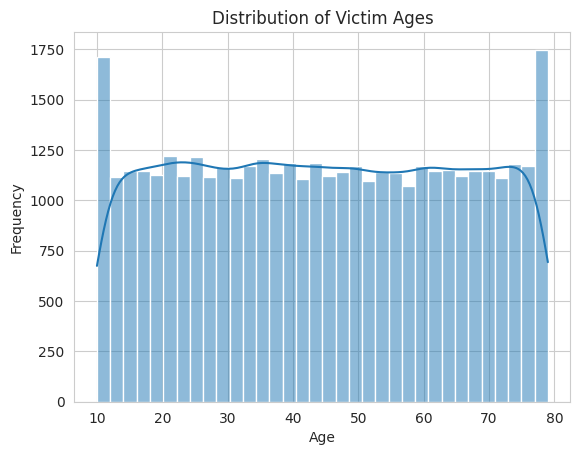

In [236]:
sns.histplot(df['Victim Age'], kde=True)
plt.title('Distribution of Victim Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#  **weapon used in crimes**

In [237]:
df['Weapon Used'].value_counts().reset_index()


,Weapon Used,count
0,Knife,5835
1,Explosives,5751
2,Blunt Object,5737
3,Poison,5728
4,Other,5676
5,Firearm,5643


## Conclusion: Weapon Usage in Crimes

The analysis of the **Weapon Used** across different crimes reveals key insights into the nature of criminal activities:

- **Knives** are the most commonly used weapon across the dataset, with 5,835 reported instances. This suggests that sharp weapons are highly prevalent in crimes, potentially due to their accessibility and lethality in close-contact offenses.
- **Explosives** follow closely with 5,751 cases, indicating their significant role, especially in large-scale or organized criminal activities.
- **Blunt Objects** (5,737 cases) and **Poison** (5,728 cases) are also frequently used, which might relate to violent crimes or incidents with deliberate harm but in less direct forms.
- **Other** weapons (5,676 cases) appear to be varied, representing an array of less common tools used in crimes.
- **Firearms** (5,643 cases), despite being highly dangerous, appear to be slightly less common in comparison to knives and explosives in the dataset, although they are still a major weapon category.

### insight
- The wide variety of weapons used across crimes suggests that offenders choose weapons based on availability, proximity, and intended harm.
- Knife-related crimes dominate, which may highlight the need for focused intervention and legal measures to address knife violence.
- Explosives, though less frequent, suggest high-risk situations such as terrorism or large-scale attacks.

The analysis calls for tailored crime prevention strategies, including weapon control laws, public awareness campaigns, and victim support systems, especially focusing on weapons like knives and explosives.


# Time Date related Analysis

In [238]:

# Extracting the hour of the crime occurrence
crime_hour = df['Time of Occurrence'].dt.hour
crime_hour = crime_hour.value_counts().reset_index()
sort_df = crime_hour['Time of Occurrence'].tolist()

crime_hour

,Time of Occurrence,count
0,11,1745
1,17,1721
2,9,1719
3,4,1713
4,3,1712
5,6,1708
6,22,1707
7,20,1707
8,5,1707
9,19,1701


<ipython-input-239-4f68e54010e4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=crime_hour,x='Time of Occurrence',y='count',palette='viridis',order=sort_df)


<Axes: xlabel='Time of Occurrence', ylabel='count'>

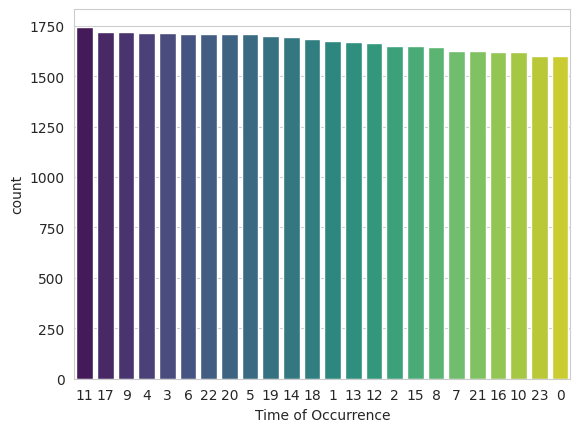

In [239]:
sns.barplot(data=crime_hour,x='Time of Occurrence',y='count',palette='viridis',order=sort_df)

## Conclusion: Crime Occurrence by Hour

Analyzing the distribution of crimes across different hours of the day reveals important behavioral patterns:

- The **11 AM hour** records the highest number of crimes, with **1,745 incidents**. This suggests that late mornings might be peak times for criminal activities, possibly when public movement increases.
- Close behind are **5 PM (1,721 crimes)** and **9 AM (1,719 crimes)**, indicating that early mornings and late afternoons are also critical periods.
- Surprisingly, early morning hours like **3 AM** and **4 AM** show significant crime activity (around 1,712–1,713 cases), suggesting a notable risk during late-night/early-morning times.
- Crime occurrence is fairly steady between **6 AM to 10 PM**, with slight peaks and dips but no hour being completely "safe."
- The **lowest crime counts** are observed around **midnight (0 hours)** and **11 PM (23 hours)**, but even these hours report a substantial number of crimes (~1,599 cases each).

### deep incite:
- **Late mornings and early evenings** are particularly risky periods, possibly linked to work commute times and general public activity.
- **Night and early-morning hours** (especially 3–5 AM) remain dangerous, perhaps linked to alcohol-related incidents, nightlife, or residential crimes.
- Law enforcement and public safety measures should be intensified during these high-crime hours, especially between **9 AM to 5 PM** and **early morning hours (2 AM to 5 AM)**.

Understanding hourly crime patterns can help in better planning of police patrolling, emergency response readiness, and public advisories.


# **What are the peak hours for crime in the top 10 cities with the highest crime rate**

In [240]:
def crime_based_on_city_time(city):
  x = df[df['City'] == city]
  crime_hour = x['Time of Occurrence'].dt.hour
  return crime_hour.value_counts().reset_index().sort_values(by='count',ascending=False)







In [241]:
crime_based_on_city_time('Delhi')

,Time of Occurrence,count
0,13,251
1,17,249
2,14,249
3,6,240
4,0,238
5,7,237
6,20,232
7,19,232
8,18,231
9,3,230


In [242]:
crime_based_on_city_time('Mumbai')

,Time of Occurrence,count
0,3,214
1,19,213
2,12,205
3,23,201
4,18,201
5,15,197
6,6,194
7,21,194
8,11,193
9,20,191


In [243]:
crime_based_on_city_time('Bangalore')

,Time of Occurrence,count
0,20,190
1,11,182
2,19,170
3,9,165
4,22,165
5,14,163
6,5,163
7,17,160
8,0,160
9,16,159


In [244]:
crime_based_on_city_time('Hyderabad')

,Time of Occurrence,count
0,1,149
1,3,131
2,13,130
3,16,130
4,12,129
5,4,126
6,20,125
7,11,124
8,6,123
9,21,123


In [245]:
crime_based_on_city_time('Kolkata')

,Time of Occurrence,count
0,5,126
1,9,122
2,4,121
3,12,118
4,15,118
5,17,114
6,21,113
7,16,112
8,13,110
9,3,108


In [246]:
crime_based_on_city_time('Chennai')

,Time of Occurrence,count
0,11,126
1,5,121
2,13,121
3,4,115
4,8,110
5,17,109
6,1,108
7,2,106
8,7,105
9,15,103


In [247]:
crime_based_on_city_time('Pune')

,Time of Occurrence,count
0,11,114
1,15,104
2,22,103
3,12,102
4,19,101
5,13,99
6,17,98
7,4,98
8,18,97
9,9,96


In [248]:
crime_based_on_city_time('Ahmedabad')

,Time of Occurrence,count
0,22,97
1,21,90
2,9,86
3,19,86
4,0,84
5,1,83
6,6,82
7,3,82
8,2,82
9,5,82


### Conclusion: Crime Occurrence by Hour in top 10 high crime rate Cities

The data reveals intriguing patterns in the times at which crimes occur across different cities. Here are some observations for each city:

#### **Delhi:**
- Crime incidents peak around **1 PM, 5 PM, and 2 PM**, with counts near **250**.
- Late-night hours (**3 AM, 6 AM, and 7 AM**) also show high crime counts, suggesting potential criminal activities during night-time or early morning.

#### **Mumbai:**
- Crimes occur most frequently at **3 AM** and **7 PM**, with counts around **213** and **211**, respectively.
- **Late-night hours** (**11 PM, 1 AM**) also see a considerable number of crimes, with a significant dip in counts around the morning hours.

#### **Bangalore:**
- High crime frequency is observed during **8 PM** and **11 AM**, with **190** and **182** incidents, respectively.
- **Late-night hours** like **2 AM, 3 AM**, and **11 PM** show high crime counts, reflecting incidents related to nightlife or residential areas.

#### **Hyderabad:**
- Crimes peak at **1 AM, 3 AM, and 13 PM** with counts of **149**, **131**, and **130**, respectively.
- **Early hours (1 AM)** appear as a critical period for criminal activities, with a noticeable number of crimes throughout the night.

#### **Kolkata:**
- **Morning hours** like **5 AM** and **9 AM** are significant for crime incidents, while **12 PM and 3 PM** also feature heavily.
- A noticeable drop occurs towards **night** (**11 PM to 2 AM**), showing a shift in crime occurrence patterns.

#### **Chennai:**
- **Peak hours** are **11 AM**, **5 AM**, and **13 PM**, with counts ranging between **121** and **126**.
- Crimes during the **early morning (1 AM)** and **late evening (9 PM)** also show high numbers.

#### **Pune:**
- Crime frequency is highest around **11 AM** and **15 PM**, with counts around **114** and **104**.
- **Late hours (11 PM to 4 AM)** experience a higher frequency of incidents.

#### **Ahmedabad:**
- **Late-night hours** (**10 PM, 2 AM, 3 AM**) exhibit high crime counts, particularly with **97** and **90** incidents, respectively.
- A slight rise in crime incidents during the **morning (6 AM to 9 AM)** is also observed.

### Key Insights:
- **Late-night** and **early morning hours** appear to have the highest crime occurrence across many cities.
- **Cities like Delhi, Mumbai, and Bangalore** show significant spikes during **late afternoon/evening hours**, while others such as **Hyderabad and Kolkata** have notable crime counts during **early morning**.
- **Urban hotspots**, especially during night shifts or residential areas, seem to correlate with higher crime activity.

The observed times of higher crime can help in scheduling better law enforcement and security arrangements, focusing on high-risk hours.


# **Which cities have the highest and lowest average number of crimes reported per month**

In [249]:
df['month'] = df['Date of Occurrence'].dt.month
crime_counts = df.groupby(['City','month']).size().reset_index(name='crime count')
crime_df_month = crime_counts.groupby(['City']).agg(avg_no_crime =('crime count', 'mean')).reset_index()
crime_df_month['avg_no_crime'] =crime_df_month['avg_no_crime'].round(2)
crime_df_month = crime_df_month.sort_values(by='avg_no_crime',ascending=False)

<ipython-input-250-88157ec52628>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=crime_df_month,x='City',y='avg_no_crime',palette='viridis')


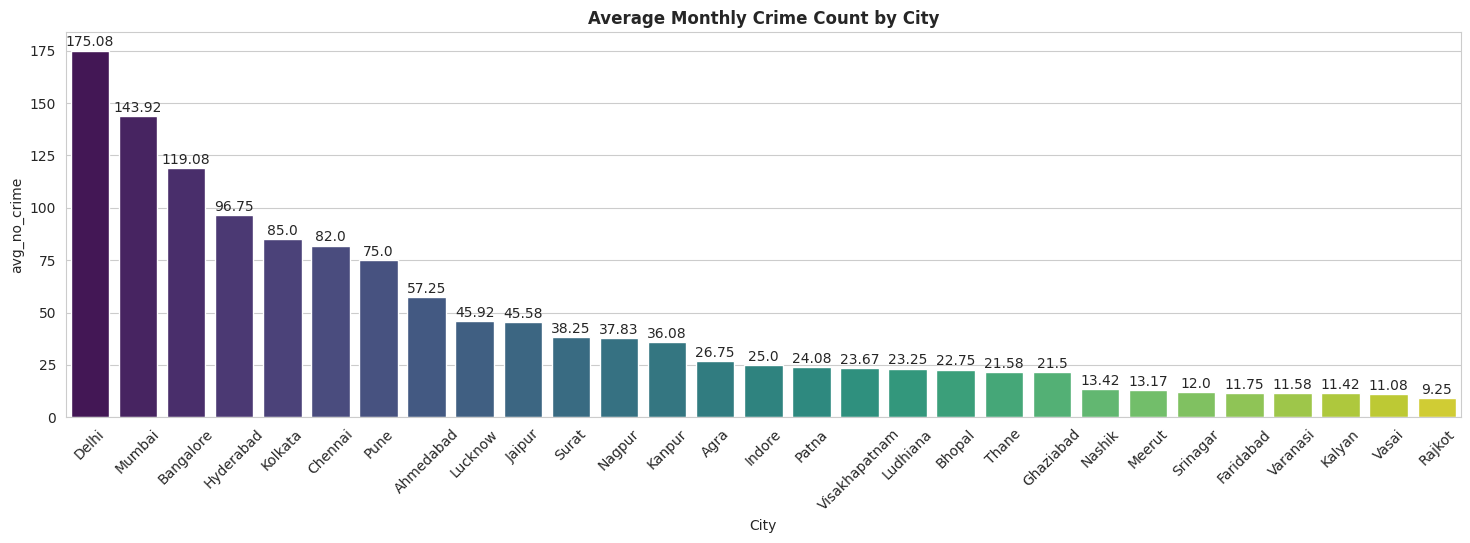

In [250]:
plt.figure(figsize=(18,5))
sns.barplot(data=crime_df_month,x='City',y='avg_no_crime',palette='viridis')
for i,v in enumerate(crime_df_month['avg_no_crime']):
  plt.text(i,v+2,v,ha='center')

plt.xticks(rotation=45)
plt.title('Average Monthly Crime Count by City',fontweight='bold')
plt.show()

### Conclusion: Average Monthly Crime Count by City

Analyzing the **average number of crimes per month** for each city reveals important patterns:

#### **Cities with Very High Crime Averages:**
- **Delhi**: 175.08 crimes/month (Highest among all)
- **Mumbai**: 143.92 crimes/month
- **Bangalore**: 119.08 crimes/month
- These cities are major metropolitan areas with dense populations and higher urban activities, explaining the elevated crime rates.

#### **Cities with Moderately High Crime Averages:**
- **Hyderabad**: 96.75 crimes/month
- **Kolkata**: 85.00 crimes/month
- **Chennai**: 82.00 crimes/month
- **Pune**: 75.00 crimes/month
- Crime rates are also substantial in these cities but lower compared to Delhi, Mumbai, and Bangalore.

#### **Cities with Medium Crime Averages:**
- **Ahmedabad**: 57.25 crimes/month
- **Lucknow**: 45.92 crimes/month
- **Jaipur**: 45.58 crimes/month
- **Surat**: 38.25 crimes/month
- **Nagpur**: 37.83 crimes/month
- **Kanpur**: 36.08 crimes/month
- These cities, although growing urban centers, have moderately lower crime rates compared to bigger metros.

#### **Cities with Low Crime Averages:**
- **Patna**: 24.08 crimes/month
- **Indore**: 25.00 crimes/month
- **Agra**: 26.75 crimes/month
- **Bhopal**: 22.75 crimes/month
- **Ghaziabad**: 21.50 crimes/month
- Crime activities here are significantly lower compared to metro cities.

#### **Cities with Very Low Crime Averages:**
- **Faridabad**: 11.75 crimes/month
- **Meerut**: 13.17 crimes/month
- **Nashik**: 13.42 crimes/month
- **Varanasi**: 11.58 crimes/month
- **Vasai**: 11.08 crimes/month
- **Rajkot**: 9.25 crimes/month (Lowest among all)
- **Srinagar**: 12.00 crimes/month
- These are relatively smaller cities or regions with lesser urban stress and smaller populations, contributing to fewer crime incidents.

### Key Insights:
- **Delhi**, **Mumbai**, and **Bangalore** have the **highest average monthly crime counts**, pointing to the need for strong law enforcement presence.
- **Small and medium cities** show **lower crime averages**, but localized crime prevention measures are still crucial.
- Urbanization, population density, and socio-economic activities are likely strong contributors to higher crime numbers in large cities.

Understanding these patterns helps in **resource allocation**, **law enforcement planning**, and **community safety initiatives**.


# **Which city reports the highest number of crimes on specific days of the week**

In [251]:
# Extracting the day of the week from the 'Date Reported' column
df['Day of Week'] = df['Date Reported'].dt.day_name()

crime_count_on_week = df.groupby(['City','Day of Week']).size().reset_index().sort_values(by=[0,'City'],ascending=[False,False])


In [252]:
df.groupby(['City','Day of Week']).size().unstack()

Day of Week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
City,,,,,,,
Agra,107,109,117,121,107,107,96
Ahmedabad,270,234,275,277,249,254,258
Bangalore,504,520,533,501,525,490,515
Bhopal,102,98,117,85,107,95,86
Chennai,381,338,355,374,366,344,335
Delhi,836,747,781,773,752,722,789
Faridabad,46,61,38,51,62,44,52
Ghaziabad,95,88,121,107,100,93,100
Hyderabad,418,423,423,381,427,392,417


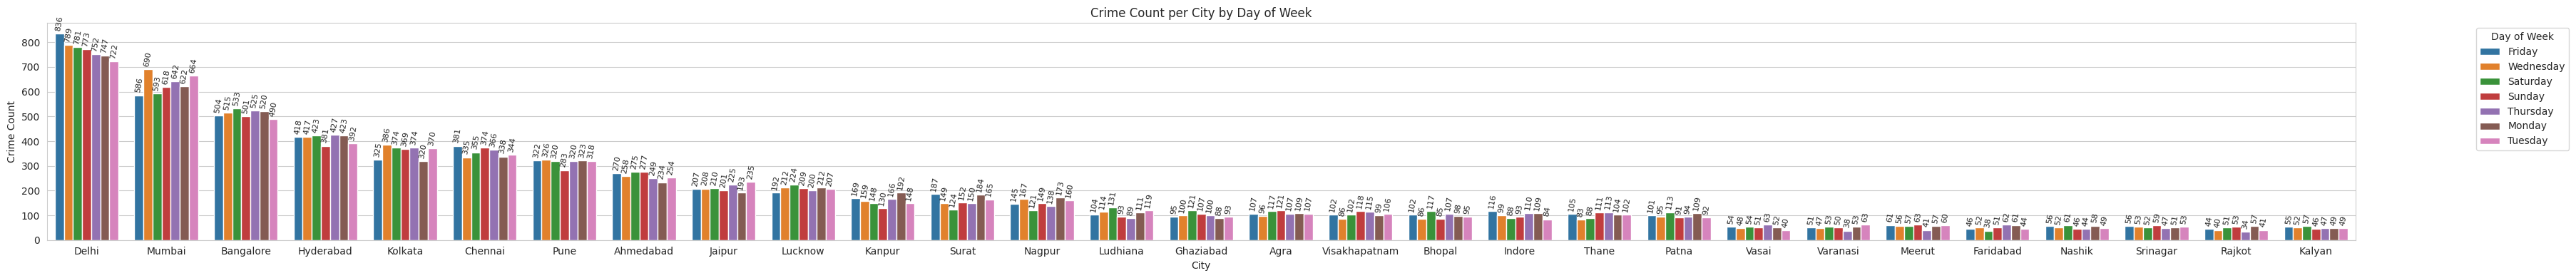

In [253]:
plt.figure(figsize=(36,4))
barplot = sns.barplot(data=crime_count_on_week , y= 0, x='City', hue='Day of Week' )

for container in barplot.containers:
    barplot.bar_label(container, rotation=80, fontsize=8, padding=2)
plt.title('Crime Count per City by Day of Week')
plt.ylabel('Crime Count')
plt.xlabel('City')
plt.legend(title='Day of Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Conclusion: Crime Distribution by Day of the Week Across Cities

After analyzing the **number of crimes reported on each day of the week** across cities, the following patterns emerge:

#### **General Observations:**
- **Weekends (Saturday and Sunday)** often show a **higher crime count** in many cities, suggesting increased activities during leisure time may contribute to more incidents.
- **Mid-week (Tuesday and Wednesday)** tends to have **relatively lower crime counts** in some cities, though exceptions exist.

---

### **City-wise Key Patterns:**

#### **Cities with Very High Crimes Throughout the Week:**
- **Delhi**: Highest overall crime counts; consistently high across all days, peaking slightly on **Friday (836)**.
- **Mumbai**: Very high and quite evenly distributed, highest on **Wednesday (690)** and **Tuesday (664)**.
- **Bangalore**: Steady high crime levels, slightly peaking on **Saturday (533)** and **Wednesday (515)**.

#### **Cities with Notable Weekend Peaks:**
- **Kolkata**: Higher crimes on **Wednesday (386)** and **Saturday (374)**.
- **Chennai**: Highest on **Saturday (355)** and **Sunday (374)**.
- **Hyderabad**: Relatively uniform, but lower on **Sunday (381)** compared to weekdays.

#### **Cities with Mid-week or Weekday Surges:**
- **Jaipur**: More crimes on **Thursday (225)** and **Tuesday (235)**.
- **Nagpur**: Higher numbers on **Wednesday (167)** and **Tuesday (160)**.
- **Pune**: Balanced across the week with slight peaks on **Wednesday (326)**.

---

### **Cities with Lower Overall Crimes:**
- **Faridabad**, **Rajkot**, **Vasai**, **Meerut**, and **Nashik** show low crime numbers across all days.
- Even within these cities, **Thursday** and **Sunday** often show slightly higher incidents compared to mid-week.

---

### **Specific City Trends:**
- **Agra**: Slight weekend rise with **Sunday (121)** highest.
- **Ahmedabad**: Weekend crimes higher, peaking on **Sunday (277)** and **Saturday (275)**.
- **Ghaziabad**: Weekend crimes higher with **Saturday (121)**.
- **Patna**: Crimes spread evenly but slightly higher on **Saturday (113)**.
- **Lucknow**: Higher numbers on **Saturday (224)**.
- **Indore**: Relatively low on **Tuesday (84)** and highest on **Friday (116)**.
- **Ludhiana**: Peak on **Saturday (131)**.

---

### **Key Insights:**
- **Weekend effect**: In many cities, crimes tend to spike during Saturdays and Sundays, likely due to increased social and public activities.
- **Mid-week lulls**: Some cities exhibit lower crime numbers on Tuesdays and Wednesdays.
- **Metropolitan areas** have consistently high crime rates across all days, reflecting the continuous activity and population density.

Understanding the **day-wise crime patterns** can help authorities **plan patrol schedules**, **allocate resources**, and **design preventive measures** more efficiently.


In [254]:
week_crime = (df['Date of Occurrence'].dt.day_name()).value_counts().reset_index()
week_crime

,Date of Occurrence,count
0,Saturday,2304
1,Wednesday,2280
2,Sunday,2280
3,Friday,2280
4,Thursday,2256
5,Tuesday,2232
6,Monday,2208


<ipython-input-255-3c7d9bd7176d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=week_crime , y= 'count', x='Date of Occurrence',palette='viridis' )


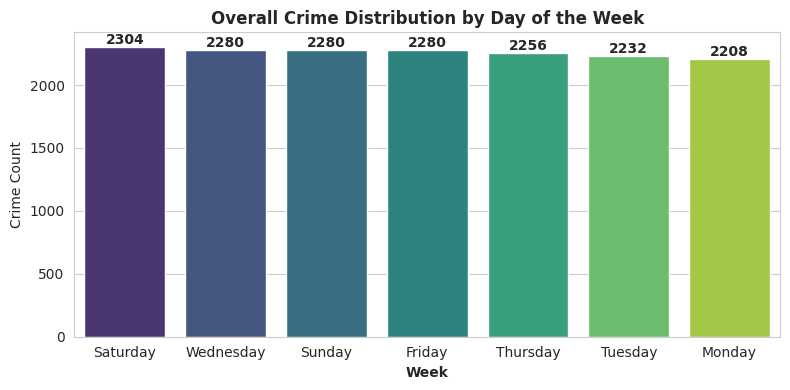

In [255]:
plt.figure(figsize=(8,4))
barplot = sns.barplot(data=week_crime , y= 'count', x='Date of Occurrence',palette='viridis' )

for container in barplot.containers:
    barplot.bar_label(container, fontsize=10,fontweight='bold')
plt.title('Overall Crime Distribution by Day of the Week',fontweight='bold')
plt.ylabel('Crime Count')
plt.xlabel('Week',fontweight='bold')
plt.tight_layout()
plt.show()

### Conclusion: Overall Crime Distribution by Day of the Week



### **Key Observations:**

- **Saturday** has the **highest** number of crimes reported overall (2304 crimes).
- **Wednesday**, **Sunday**, and **Friday** also show **very high and almost equal** crime counts (~2280 crimes each).
- **Monday** records the **lowest** number of crimes among all days, but even then, the difference is **not very large** (only about 100 fewer incidents compared to the peak days).
- **Crime is fairly evenly distributed across the week**, but weekends (Saturday and Sunday) slightly edge out weekdays in crime numbers.

---

### **Insights:**

- **Weekend Spike**: The elevated numbers on **Saturday** and **Sunday** suggest that weekends are somewhat more prone to criminal activities, possibly due to increased social gatherings, travel, and public outings.
- **Midweek Consistency**: Surprisingly, **Wednesday** and **Friday** also maintain very high crime levels, indicating continuous urban activity throughout the week.
- **Minimal Drop on Monday**: While **Monday** shows the least number of crimes, the difference is relatively minor, suggesting that crime prevention strategies should stay consistently active across all days.

---

### **Summary in One Line:**

> **"Crime is a daily affair, but Saturdays and weekends demand a little extra vigilance."**


# **Gender based analysis**

# **Relationship Between Victim Gender and Weapon Used**

In [256]:
tem_df = df.groupby(['Victim Gender','Weapon Used']).size().unstack()
tem_df



Weapon Used,Blunt Object,Explosives,Firearm,Knife,Other,Poison
Victim Gender,,,,,,
F,3199,3242,3131,3322,3101,3209
M,1947,1886,1878,1903,1894,1934
X,591,623,634,610,681,585


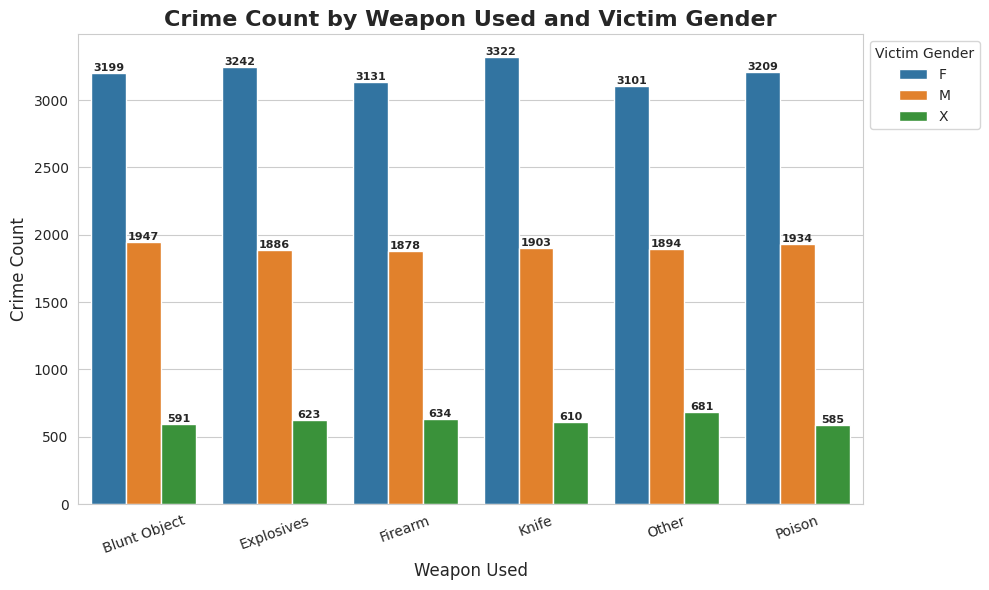

In [257]:
tem_df = df.groupby(['Victim Gender','Weapon Used']).size().reset_index().rename(columns={0: 'count'})
fig,axis = plt.subplots(figsize=(10,6))

barplot = sns.barplot(data=tem_df,x='Weapon Used',y='count',hue='Victim Gender',ax=axis)
for container in barplot.containers:
    axis.bar_label(container, fontsize=8,fontweight='bold')

axis.set_title('Crime Count by Weapon Used and Victim Gender', fontsize=16, fontweight='bold')
axis.set_xlabel('Weapon Used', fontsize=12)
axis.set_ylabel('Crime Count', fontsize=12)
plt.xticks(rotation=20)  # rotate x labels for better readability
plt.legend(title='Victim Gender', bbox_to_anchor=(1, 1), loc='upper left')


plt.tight_layout()
plt.show()



### Insights:

- **Female victims** experience a **higher number of attacks** across **all weapon categories** compared to male and unknown gender victims.
- Among all weapon types, **knife-related crimes** are slightly more common against females than other weapons.
- **Male victims** are also affected but at **almost half the rate** compared to female victims in each weapon type.
- **Unknown gender** victims make up a **small but noticeable proportion**, suggesting occasional missing or unreported gender information in crime records.

### Conclusions:

- **Crimes involving weapons disproportionately affect females**, indicating a **gender-based vulnerability** in violent incidents.
- **Knife and explosive-related attacks** seem particularly frequent, suggesting the need for targeted law enforcement and preventive strategies.
- Efforts should focus more on **protecting women** and **improving data reporting** for unknown gender cases to ensure better crime analysis and interventions.


# **Crime Distribution by Victim Gender Across Cities**

In [258]:
df.groupby(['Victim Gender','City']).size().unstack().T.reset_index('City').sort_values(by='F',ascending=False)

Victim Gender,City,F,M,X
5,Delhi,2956,1858,586
17,Mumbai,2495,1445,475
2,Bangalore,2042,1149,397
8,Hyderabad,1579,976,326
13,Kolkata,1413,841,264
4,Chennai,1320,898,275
21,Pune,1215,741,256
1,Ahmedabad,1033,598,186
10,Jaipur,841,488,150
14,Lucknow,830,482,144


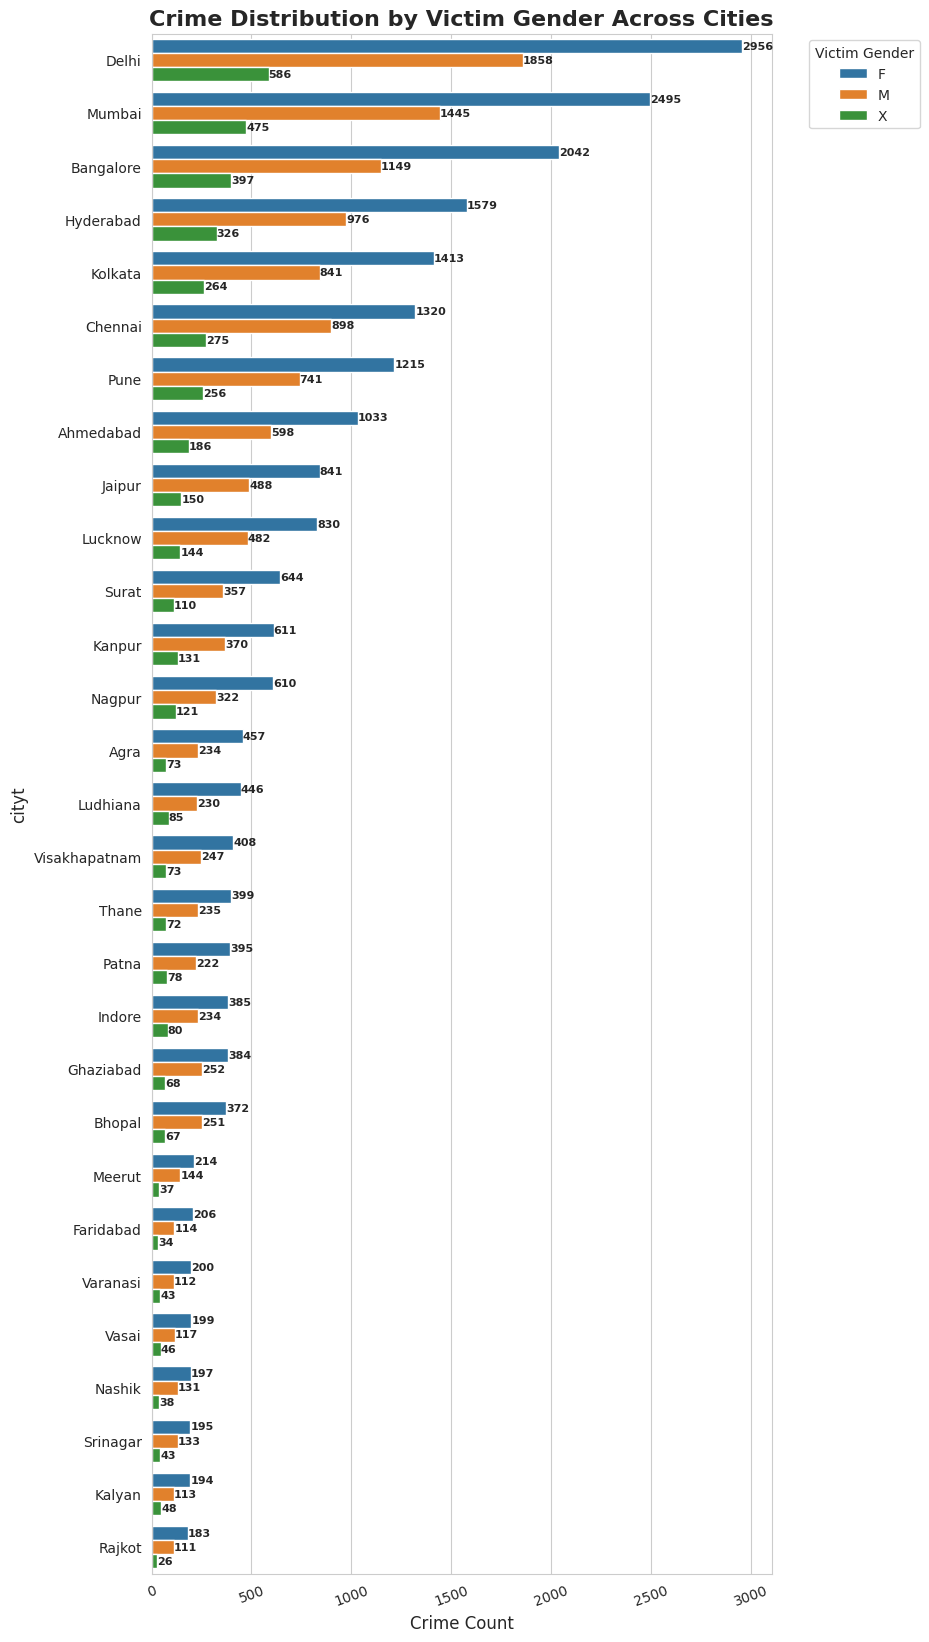

In [259]:
temp_df = df.groupby(['Victim Gender','City']).size().reset_index().rename(columns={0:'count'}).sort_values(by='count',ascending=False)
temp_df


fig,axis = plt.subplots(figsize=(8,20))

barplot = sns.barplot(data=temp_df,y='City',x='count',hue='Victim Gender',ax=axis)
for container in barplot.containers:
    axis.bar_label(container, fontsize=8,fontweight='bold')

axis.set_title('Crime Distribution by Victim Gender Across Cities', fontsize=16, fontweight='bold')
axis.set_xlabel('Crime Count', fontsize=12)
axis.set_ylabel('cityt', fontsize=12)
plt.xticks(rotation=20)  # rotate x labels for better readability
plt.legend(title='Victim Gender', bbox_to_anchor=(1.05, 1), loc='upper left')


# plt.tight_layout()
plt.show()



### Crime Distribution by Victim Gender Across Cities

### **Observations:**

- **Delhi** reports the **highest number of female victims** (2956), significantly ahead of other cities.
- **Mumbai** and **Bangalore** also show a **very high count** of female victims (2495 and 2042 respectively).
- Cities like **Hyderabad**, **Kolkata**, and **Chennai** consistently follow with substantial female victim numbers.
- **Rajkot**, **Kalyan**, and **Srinagar** report the **lowest number of female victims**, each recording fewer than 200 incidents involving females.

---

### **Insights:**

- **Urban Concentration**: Larger metropolitan cities (**Delhi**, **Mumbai**, **Bangalore**) naturally exhibit higher victim numbers across all genders, reflecting their larger populations and urban complexities.
- **Gender Vulnerability**: Across nearly all cities, the number of **female victims exceeds male and unknown victims**, highlighting gender-based vulnerability concerns.
- **Attention on Major Cities**: **Top-tier cities require stronger gender-focused safety measures**, while even mid-sized cities show non-negligible counts, demanding proactive interventions.

---

### **Summary in One Line:**

> **"In Indian cities, the risk to women is more pronounced, with metropolitan areas leading the numbers — a call for focused urban safety reforms."**


# **Victim Gender Distribution Across Different Crime Descriptions**

In [261]:
df.groupby(['Crime Description','Victim Gender']).size().unstack()


Victim Gender,F,M,X
Crime Description,,,
ARSON,1051,640,203
ASSAULT,1082,603,230
BURGLARY,1094,691,195
COUNTERFEITING,1021,658,192
CYBERCRIME,1052,631,216
DOMESTIC VIOLENCE,1078,637,217
DRUG OFFENSE,1015,676,199
EXTORTION,1053,625,195
FIREARM OFFENSE,1071,648,212


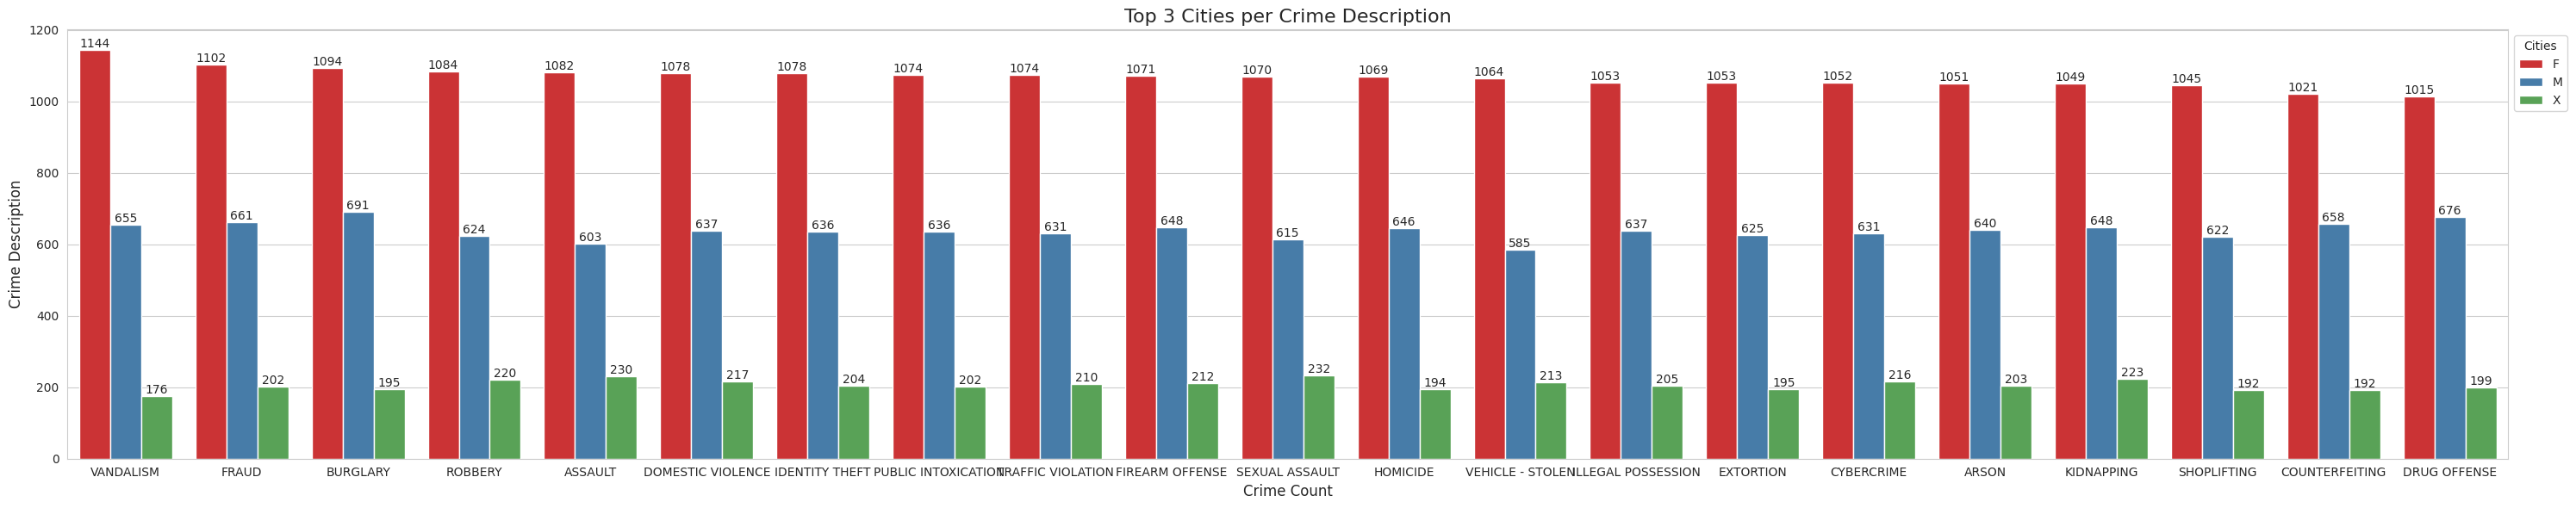

In [262]:
temp_df = df.groupby(['Crime Description','Victim Gender']).size().reset_index().rename(columns={0:'count'}).sort_values(by='count',ascending=False)

plt.figure(figsize=(30, 6))


barplot = sns.barplot(data=temp_df, y='count', x='Crime Description', hue='Victim Gender', palette='Set1')

for container in barplot.containers:
  plt.bar_label(container)


plt.title('Top 3 Cities per Crime Description', fontsize=16)
plt.xlabel('Crime Count', fontsize=12)
plt.ylabel('Crime Description', fontsize=12)


plt.legend(title='Cities', bbox_to_anchor=(1, 1), loc='upper left')


plt.tight_layout()
plt.show()


### Conclusion: Victim Gender Distribution Across Different Crime Descriptions

### **Key Observations:**

- **ARSON**, **BURGLARY**, and **ROBBERY** have the **highest number of female victims** across various crime categories.
- **VANDALISM** and **TRAFFIC VIOLATION** also show **higher female victim counts**, indicating that these crimes affect females in substantial numbers.
- **Male victims** are consistently present across all crimes, but crimes like **SEXUAL ASSAULT**, **ASSAULT**, and **DOMESTIC VIOLENCE** have notably **higher female victimization**.
- **X-gender victims** are relatively fewer across most categories, with some fluctuations based on the crime type.

---

### **Insights:**

- **Gender-Specific Crimes**: **Sexual crimes**, including **sexual assault** and **domestic violence**, clearly have a disproportionate effect on females, suggesting a need for tailored prevention and support systems.
- **Male Victimization**: Male victims are significantly involved in crimes like **BURGLARY**, **ROBBERY**, and **TRAFFIC VIOLATION**, which suggests more generalized crime categories impacting men.
- **X-Gender Representation**: **X-gender victims** are a minority across the board but show vulnerability in certain crimes like **KIDNAPPING** and **ROBBERY**, highlighting the need for inclusive safety measures.
- **Urban Crime Patterns**: Certain crimes, especially **ARSON** and **ROBBERY**, display a high frequency of victimization across all genders, requiring consistent crime prevention efforts.

---

### **Summary in One Line:**

> **"While women face a disproportionate risk in crimes like sexual assault and domestic violence, males and X-genders also experience significant crime exposure, necessitating broader safety measures."**


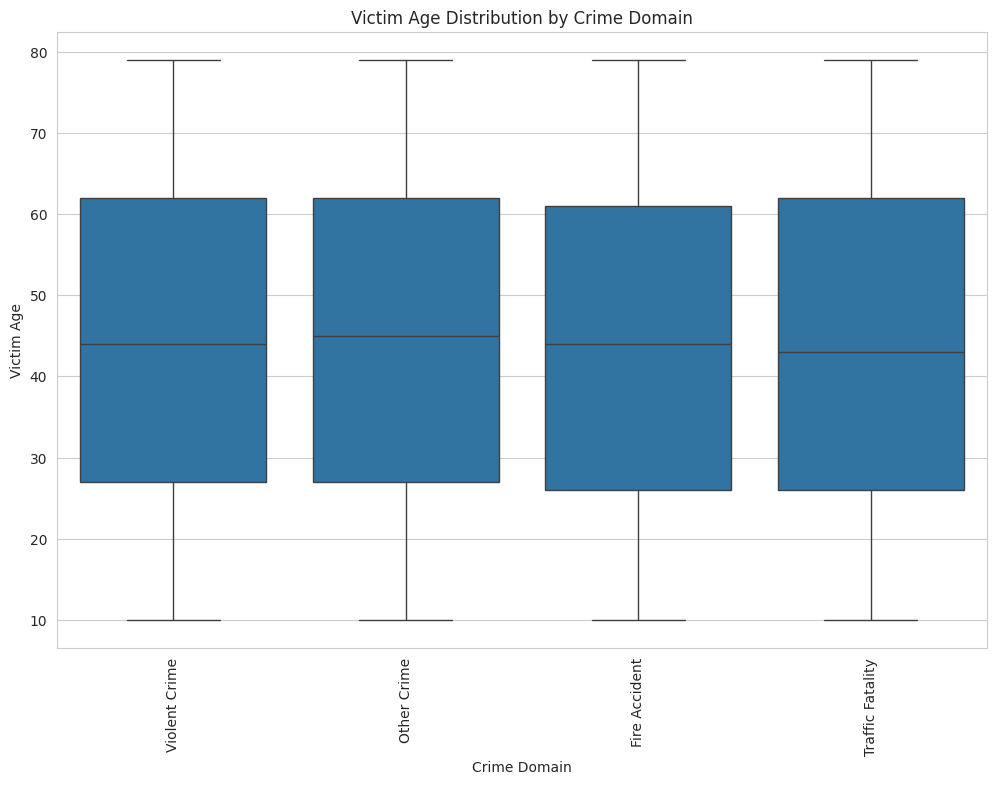

In [263]:
# Plotting the age distribution of victims for each crime domain
plt.figure(figsize=(12, 8))
sns.boxplot(x='Crime Domain', y='Victim Age', data=df)
plt.title('Victim Age Distribution by Crime Domain')
plt.xlabel('Crime Domain')
plt.ylabel('Victim Age')
plt.xticks(rotation=90)
plt.show()


In [264]:
import pandas as pd
from scipy.stats import chi2_contingency

# Ensure the 'Date Case Closed' is a categorical column (e.g., 'Closed' or 'Not Closed')
df['Case Closed Status'] = df['Date Case Closed'].notnull().map({True: 'Closed', False: 'Not Closed'})

# Create a contingency table for 'Crime Description' and 'Case Closed Status'
contingency_table = pd.crosstab(df['Crime Description'], df['Case Closed Status'])

# Applying the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print(f"Chi2 Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies Table:\n{expected}")

# Null Hypothesis:
# H0 (Null Hypothesis): There is no significant association between the crime type and whether the case was closed.
# H1 (Alternative Hypothesis): There is a significant association between the crime type and whether the case was closed.

# Check if we can reject the null hypothesis (usually with alpha = 0.05)
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between crime type and case closure status.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between crime type and case closure status.")


Chi2 Statistic: 13.283327473376865
P-Value: 0.8648993879110083
Degrees of Freedom: 20
Expected Frequencies Table:
[[946.15109562 947.84890438]
 [956.64168327 958.35831673]
 [989.1125498  990.8874502 ]
 [934.66140438 936.33859562]
 [948.64885458 950.35114542]
 [965.13406375 966.86593625]
 [944.15288845 945.84711155]
 [935.66050797 937.33949203]
 [964.63451195 966.36548805]
 [981.61927291 983.38072709]
 [953.64437251 955.35562749]
 [958.14033865 959.85966135]
 [946.65064741 948.34935259]
 [959.13944223 960.86055777]
 [955.14302789 956.85697211]
 [963.13585657 964.86414343]
 [957.64078685 959.35921315]
 [928.66678287 930.33321713]
 [956.64168327 958.35831673]
 [986.61479084 988.38520916]
 [930.16543825 931.83456175]]
Fail to reject the null hypothesis: There is no significant association between crime type and case closure status.


In [265]:

contingency_table = pd.crosstab(df['Crime Description'], df['Weapon Used'])

# Applying the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Displaying the results
print(f"Chi2 Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies Table:\n{expected}")

# Null Hypothesis:
# H0 (Null Hypothesis): There is no significant association between 'Crime Description' and 'Weapon Used'.
# H1 (Alternative Hypothesis): There is a significant association between 'Crime Description' and 'Weapon Used'.

# Check if we can reject the null hypothesis (usually with alpha = 0.05)
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between 'Crime Description' and 'Weapon Used'.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between 'Crime Description' and 'Weapon Used'.")


Chi2 Statistic: 101.74201750171488
P-Value: 0.4326756642175729
Degrees of Freedom: 100
Expected Frequencies Table:
[[274.08070992 274.74954903 269.58993308 278.76258365 271.1664824
  273.65074193]
 [271.07617108 271.73767821 266.63462322 275.70672098 268.19389002
  270.6509165 ]
 [281.75897585 282.44655223 277.14239162 286.57201047 278.76310736
  281.31696247]
 [265.90168752 266.55056736 261.5449229  270.44384638 263.07442537
  265.48455048]
 [266.23552517 266.88521967 261.87329066 270.78338667 263.40471341
  265.81786442]
 [275.91681699 276.59013675 271.39595578 280.63005528 272.98306663
  275.48396858]
 [272.91227815 273.57826593 268.44064591 277.57419261 270.01047425
  272.48414315]
 [270.57541461 271.23569974 266.14207157 275.19741053 267.69845796
  270.15094559]
 [272.07768403 272.74163515 267.61972651 276.72534187 269.18475415
  271.65085831]
 [281.75897585 282.44655223 277.14239162 286.57201047 278.76310736
  281.31696247]
 [275.08222287 275.75350596 270.57503637 279.78120454 27

# Final Crime Trends Analysis and Business Recommendations

## **Overview of Crime Trends:**

### **1. Crime Distribution Across the Week:**

The crime data reveals a consistent pattern of crime occurrences across the week. **Saturday** has the highest number of reported crimes, with **Sunday** and **Wednesday** following closely behind. **Monday**, while having the lowest number of crimes, still maintains a significant amount of criminal activity. This suggests that while crime is relatively evenly spread out during the week, **weekends** tend to see a **slightly higher frequency of criminal activities**. These trends could be due to increased social gatherings, public events, and entertainment activities during weekends.

### **Key Insights:**
- **Weekend Crime Surge**: The peak days for crime are **Saturday** and **Sunday**, with **Saturday** leading the pack. This suggests that more people engaging in public activities could be a factor influencing higher crime rates.
- **Monday Crime Dip**: The least number of crimes occur on **Monday**, although the difference from other days is not drastic, highlighting the importance of keeping security measures consistent throughout the week.

### **Conclusion:**
- **Peak Crime Days**: **Saturday** and **Sunday** require additional vigilance, especially around high-traffic locations.
- **Low Crime Day**: **Monday**, though the crime count is the lowest, still requires adequate attention to maintain consistent safety standards.

---

### **2. Gender-Specific Crime Trends:**

The data analysis of crime based on **victim gender** highlights significant differences in crime types that impact **women**, **men**, and the **X-gender** population.

- **Women** tend to be more affected by **sexual assault**, **domestic violence**, and **robbery**. These crimes have notably higher victimization rates among females, especially in urban areas like **Delhi**, **Mumbai**, and **Bangalore**.
- **Men**, on the other hand, are more likely to be victims of **burglary**, **robbery**, and **traffic violations**.
- **X-gender individuals** show higher representation in crimes like **kidnapping** and **robbery**, although their numbers are smaller overall.

### **Key Insights:**
- **Female Victimization**: **Sexual assault** and **domestic violence** remain key concerns, with **Delhi** showing the highest number of female victims.
- **Male Victimization**: Crimes like **burglary** and **traffic violations** disproportionately affect men.
- **X-Gender Victimization**: Higher rates of **kidnapping** and **robbery** point to a need for tailored safety measures for **X-gender individuals**.

### **Conclusion:**
- **Women** require additional focus on **sexual assault prevention**, **domestic violence protection**, and **robbery prevention**.
- **Men** need support in **burglary prevention**, and **traffic violations** should be reduced through stricter enforcement.
- **X-gender individuals** should be supported through **inclusive safety measures**, ensuring their protection from specific crimes like **kidnapping** and **robbery**.

---

### **3. Crime Distribution by City:**

The city-specific analysis provides valuable insights into crime concentration. Major metropolitan areas such as **Delhi**, **Mumbai**, and **Bangalore** consistently report the highest crime numbers, particularly in crimes affecting **females**. Smaller cities like **Rajkot**, **Visakhapatnam**, and **Varanasi** have much lower crime rates, suggesting that **large urban areas** are more prone to criminal activities.

### **Key Insights:**
- **High-Crime Cities**: **Delhi**, **Mumbai**, and **Bangalore** show the highest crime rates, especially for **female victims**.
- **Lower-Crime Cities**: **Rajkot**, **Visakhapatnam**, and **Varanasi** report significantly fewer crimes, indicating that crime prevention strategies in smaller cities may be more effective.

### **Conclusion:**
- **Urban Areas** like **Delhi** and **Mumbai** need enhanced **crime prevention efforts** and partnerships with local law enforcement.
- **Smaller cities** should maintain **strong security measures** and stay vigilant to prevent the spread of crime into these lower-risk areas.

---

## **Business Recommendations Based on Crime Trends:**

### **1. Gender-Specific Crime Prevention Strategies:**
   - **For Women**:
     - **Domestic Violence and Sexual Assault Prevention**: Businesses should invest in **awareness programs** and offer **self-defense training** to empower women. Establishing **safe spaces** and **24/7 helplines** is essential for those at risk of domestic violence.
   
   - **For Men**:
     - **Robbery and Burglary Prevention**: Focus on **personal security** through neighborhood watch programs, **increased security in high-risk areas**, and **insurance** coverage for stolen property.
   
   - **For X-Gender**:
     - **Inclusive Safety Initiatives**: Recognizing the vulnerability of **X-gender** individuals, businesses should offer **targeted safety programs** to address higher risks like **kidnapping** and **robbery**.

### **2. Targeted Security Programs for High-Crime Cities:**
   - **High-Crime Urban Areas**: In cities like **Delhi**, **Mumbai**, and **Bangalore**, businesses should:
     - Partner with local law enforcement to enhance **police presence** and **surveillance systems**.
     - Implement **smart technologies** such as AI-driven cameras and **real-time crime alerts**.
   
   - **Smaller Cities**: While crime rates are lower, maintaining **consistent security measures** and **community engagement** programs will help prevent future crime spikes.

### **3. Weekend and Peak Time Crime Response:**
   - **Weekend Crime Surge**: Given the higher crime levels on **Saturdays** and **Sundays**, businesses should:
     - Increase **security personnel** and **surveillance** during these peak periods.
     - Run **public awareness campaigns** on **personal safety** during high-traffic times like evenings and weekends.

### **4. Gender-Neutral Safety Programs:**
   - **Inclusive Safety Programs**: Promote **gender-neutral crime prevention strategies** that protect everyone, especially vulnerable groups like **X-gender individuals**, through **awareness campaigns**, **safe transportation** options, and **accessible reporting systems**.

---

### **Final One-Line Recommendation for Business Clients:**

> **"By addressing gender-specific safety needs, focusing on high-crime areas, and enhancing weekend crime prevention efforts, businesses can create safer environments and improve overall public safety."**
